<a href="https://colab.research.google.com/github/rajeshmay09/MalariaTransfer/blob/main/Mobilenet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.models import Model, load_model

In [ ]:
train_dir = '/content/drive/MyDrive/TRAIN'
test_dir = '/content/drive/MyDrive/TEST'

In [ ]:
image_size = 128
batch_size = 64 

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.5
)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 10000 images belonging to 2 classes.


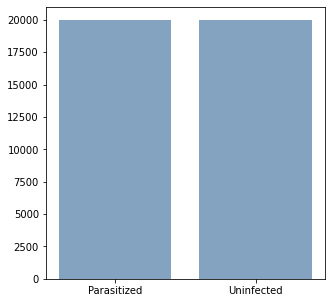

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
cls_train = train_generator.classes
from collections import OrderedDict
classes = list(train_generator.class_indices.keys())
num_values = [] #32
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(2):
  num_values.append(valdict[i])
plt.figure(figsize=(5,5))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(x, xlabel)
plt.show()

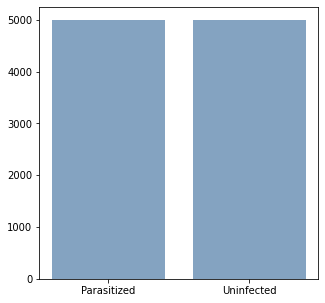

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
cls_test = test_generator.classes
from collections import OrderedDict


classes = list(test_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_test, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(2):
    num_values.append(valdict[i])
plt.figure(figsize=(5,5))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(x, xlabel)
plt.show()

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights="imagenet",
)

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Activation('relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = model.fit_generator(train_generator, epochs=25, validation_data= test_generator, steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


629/629 [==============================] - 25s 26ms/step - loss: 0.3202 - accuracy: 0.8626 - val_loss: 0.2167 - val_accuracy: 0.9521
Epoch 2/25
629/629 [==============================] - 16s 25ms/step - loss: 0.1656 - accuracy: 0.9463 - val_loss: 0.1280 - val_accuracy: 0.9561
Epoch 3/25
629/629 [==============================] - 16s 25ms/step - loss: 0.1548 - accuracy: 0.9489 - val_loss: 0.2765 - val_accuracy: 0.9311
Epoch 4/25
629/629 [==============================] - 16s 25ms/step - loss: 0.1479 - accuracy: 0.9514 - val_loss: 0.1478 - val_accuracy: 0.9490
Epoch 5/25
629/629 [==============================] - 16s 25ms/step - loss: 0.1388 - accuracy: 0.9533 - val_loss: 0.1918 - val_accuracy: 0.9539
Epoch 6/25
629/629 [==============================] - 16s 25ms/step - loss: 0.1381 - accuracy: 0.9540 - val_loss: 0.1294 - val_accuracy: 0.9628
Epoch 7/25
629/629 [==============================] - 16s 25ms/step - loss: 0.1361 - accuracy: 0.9549 - val_loss: 0.1312 - val_accuracy: 0.9611
Epo

In [ ]:
x = [1,2,3]

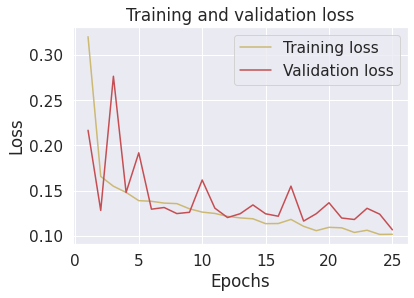

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

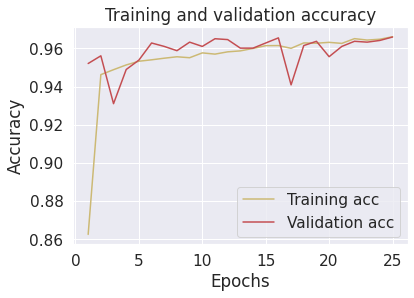

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/mobilenetv2.h5')

In [ ]:
pred_probabilities = model.predict(test_generator)

313/313 [==============================] - 93s 297ms/step


In [ ]:
pred_probabilities

array([[4.5455314e-02],
       [3.3191512e-03],
       [4.3177297e-06],
       ...,
       [9.1294122e-01],
       [9.9800360e-01],
       [9.9751186e-01]], dtype=float32)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.8
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5000
           1       0.96      0.94      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
cm = confusion_matrix(test_generator.classes,predictions)

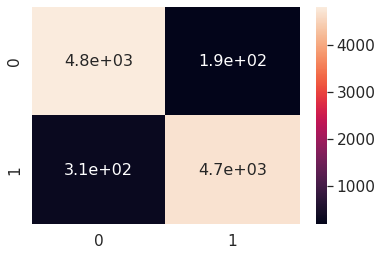

[[4813  187]
 [ 313 4687]]


In [ ]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

print(cm)